# Subplots with Matplotlib

Subplots are a good way of concisely showing the information in a dataset and they can be utilised for a lot of explanatory analyses. There are a few methods for achieving this. I have outlined two of the ways that this can be done using `matplotlib` below. 

1. Use `plt.subplot()`
2. Define axes prior and then assign plot calls to a particular axes element

First I'll pull in the simple necessary imports. 

In [1]:
# Imports and data loading
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Now that we have done that, we can read in our data from a locally stored csv file. Information about this data can be found on Kaggle [here](https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset).  

I have done a number of in-depth notebooks on this dataset. They can be found on my [personal page](https://www.kaggle.com/willcanniford).

In [2]:
data = pd.read_csv('../data/Dataset_spine.csv').iloc[:, :-1]
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [3]:
data.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Let's just pull the first two columns for this example. 

In [4]:
x = data.Col1
y = data.Col2

## Using `subplot` 

The structure of the input for `subplot` is firstly defining the dimensions of the axes that you desire, before setting the 'active' plot space to fill with the next plot; in this way you can position plots where desired within that predefined grid.  

Note that the grid positions are read left to right, and top to bottom. 

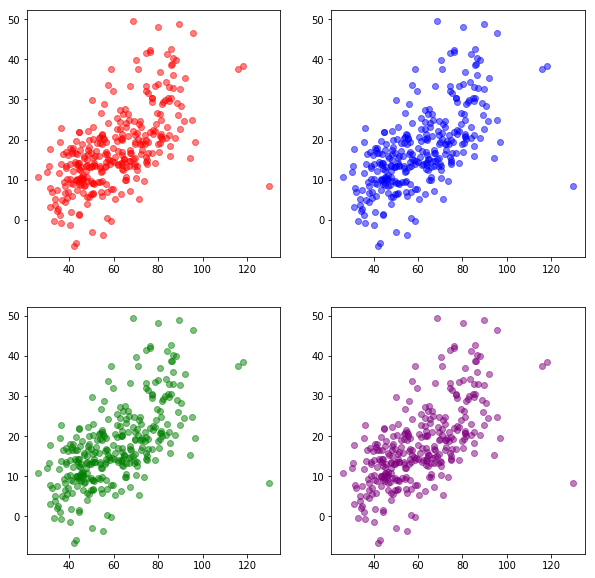

In [5]:
# Define the figure size
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.scatter(x, y, color = 'red', alpha=0.5)
plt.subplot(2, 2, 2)
plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.subplot(2, 2, 3)
plt.scatter(x, y, color = 'green', alpha = 0.5)
plt.subplot(2, 2, 4)
plt.scatter(x, y, color = 'purple', alpha = 0.5)
plt.show()

## Using axis structure

When using axis array, we should either:
1. Use `plt.plot()` to plot on the current axis, and use `plt.sca()` to set the axis. 
2. Call `.plot()` directly on the axes in question  

[Stack overflow answer](https://stackoverflow.com/questions/47726982/typeerror-inner-got-multiple-values-for-keyword-argument-ax)

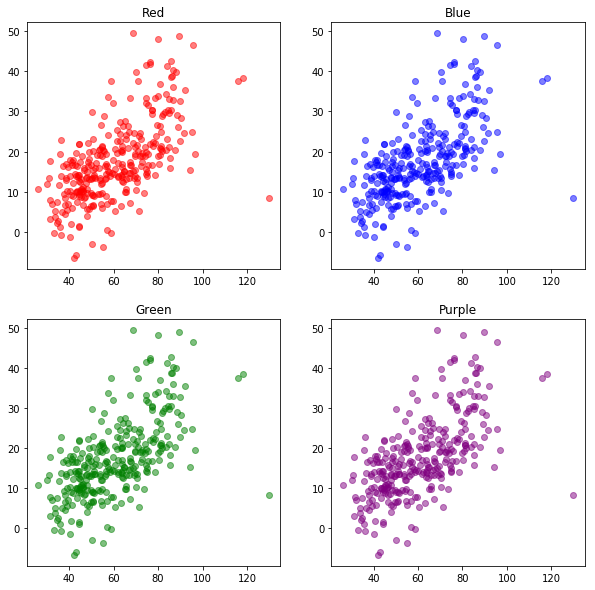

In [6]:
# Define the figure and the axes array
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

axarr[0,0].scatter(x, y, color = 'red', alpha=0.5)
axarr[0,1].scatter(x, y, color = 'blue', alpha=0.5)
axarr[1,0].scatter(x, y, color = 'green', alpha=0.5)
axarr[1,1].scatter(x, y, color = 'purple', alpha=0.5)
# data.Height.value_counts().head(30).plot.bar(ax = axarr[0])
# data.Weight.value_counts().head(30).plot.bar(ax = axarr[1])

# Set additional titles
axarr[0,0].set_title('Red')
axarr[0,1].set_title('Blue')
axarr[1,0].set_title('Green')
axarr[1,1].set_title('Purple')

# Adjust the spacing between plots
# plt.subplots_adjust(hspace=0.5)

# Rotate the axes figures 
for ax in fig.axes:
    # Set the active subplots  
    plt.sca(ax)
#     plt.xticks(rotation=60)

plt.show()

We can simplify this process further through looping through the axes elements and plotting to them iteratively as shown below.  

Another thing that is made easily capable through the definition of this axes using `subplots` is sharing of axis scales, by setting the `sharex` and `sharey` arguments to `True`. 

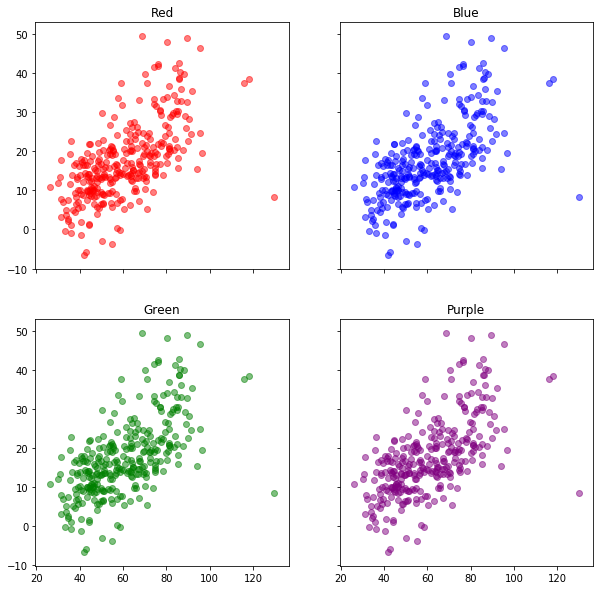

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
colours = ['Red', 'Blue', 'Green', 'Purple']

for index, ax in enumerate(fig.axes):
    ax.scatter(x, y, color = colours[index], alpha = 0.5)
    ax.set_title(colours[index])